<a href="https://colab.research.google.com/github/msribeiror29/Classification-Case_Churn/blob/main/Case_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Case - Churn.

###The objective of this project is to build a predictive model to identify customers with a high probability of churn, following the CRISP-DM methodology.

####Target:

    Churn — Customer churned or not

####Numeric variables:

    Tenure — Number of months the client has been on base
    MonthlyCharges — The amount consumed per customer monthly
    TotalCharges — The amount consumed per total customer

####Categorical variables:

	CustomerID - client id
	Gender — M/F
	SeniorCitizen — Whether or not the citizen is elderly (0.1)
	Partner — Whether or not the client is married
	Dependents — Client has dependents (Yes, No)
	PhoneService — Customer has telephone service (Yes, No)
	MulitpleLines — Whether the customer has multiple lines or not (Yes, No, No Phone Service)
	InternetService — Type of internet service (DSL, Fiber Optic, None)
	OnlineSecurity — If the customer has online security (Yes, No, No Internet Service)
	OnlineBackup — If the customer has Online Backup (Yes, No, No Internet Service)
	DeviceProtection — Whether the customer has device protection (Yes, No, No Internet Service)
	TechSupport — If the customer has technological support (Yes, No, No Internet Service)
	StreamingTV — If the customer has streaming TV (Yes, No, No Internet Service)
	StreamingMovies — If the customer has a movie streaming service (Yes, No, No Internet Service)
	Contract — Customer contract term (Monthly, 1-Year, 2-Year)
	PaperlessBilling — Whether or not the customer has a paperless bill (Yes, No)
	PaymentMethod — Customer Payment Method(E-Check, Mailed Check, Bank Transfer (Auto), Credit Card (Auto))

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/churn_data.xlsx')
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7031,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


#Data Understanding.

####Initially, a descriptive and exploratory analysis of the data is conducted to gain a deeper understanding of the variables.

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df.isna().count()

customerID          7032
gender              7032
SeniorCitizen       7032
Partner             7032
Dependents          7032
tenure              7032
PhoneService        7032
MultipleLines       7032
InternetService     7032
OnlineSecurity      7032
OnlineBackup        7032
DeviceProtection    7032
TechSupport         7032
StreamingTV         7032
StreamingMovies     7032
Contract            7032
PaperlessBilling    7032
PaymentMethod       7032
MonthlyCharges      7032
TotalCharges        7032
Churn               7032
dtype: int64

####Various statistics are calculated, including the count of churn and non-churn customers:

In [ ]:
df_agg = df.groupby("Churn")['customerID'].count().reset_index()
df_agg = pd.DataFrame(df_agg)
df_agg

,Churn,customerID
0,No,5163
1,Yes,1869


<Axes: xlabel='Churn', ylabel='customerID'>

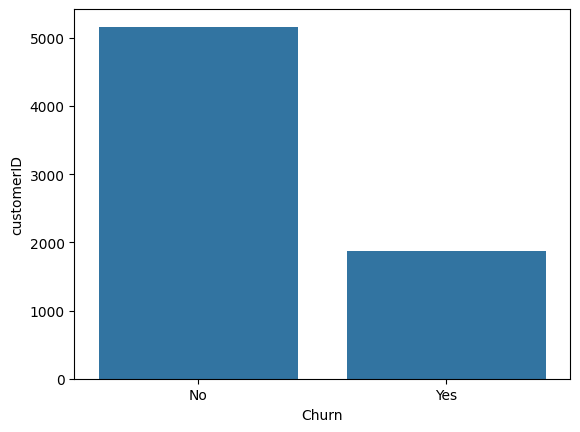

In [ ]:
sns.barplot(data = df_agg, x = 'Churn', y = 'customerID')

####A bar graph is also created to display the customer count by payment method:


In [ ]:
df_agg_p = df.groupby ('PaymentMethod') ['customerID'].count().reset_index()
df_agg_p = pd.DataFrame(df_agg_p)
df_agg_p

,PaymentMethod,customerID
0,Bank transfer (automatic),1542
1,Credit card (automatic),1521
2,Electronic check,2365
3,Mailed check,1604


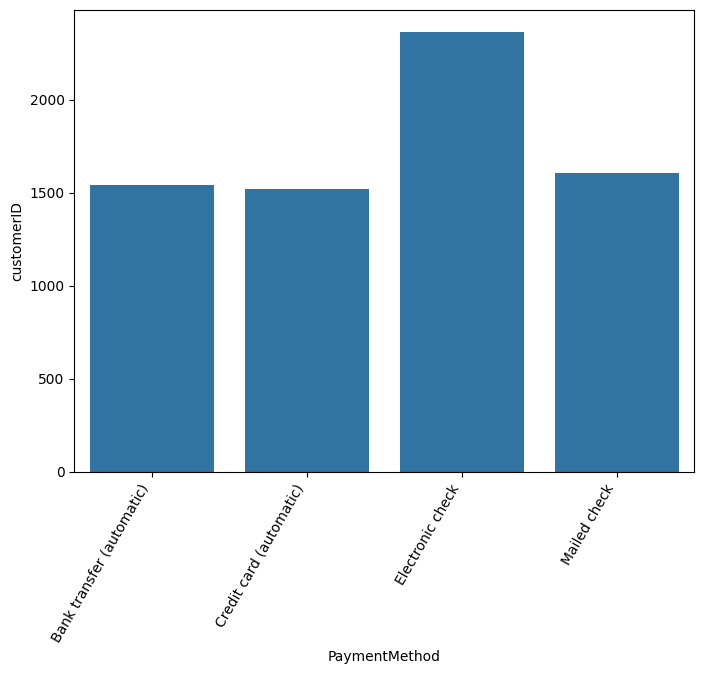

In [ ]:
plt.figure(figsize = [8,6])
sns.barplot(data = df_agg_p, x = 'PaymentMethod', y = 'customerID')
plt.xticks(rotation = 60, ha='right');

####And by genre:

In [ ]:
df_gen = df.groupby('gender')['customerID'].count().reset_index()
df_gen = pd.DataFrame(df_gen)
df_gen

,gender,customerID
0,Female,3483
1,Male,3549


<Axes: xlabel='gender', ylabel='customerID'>

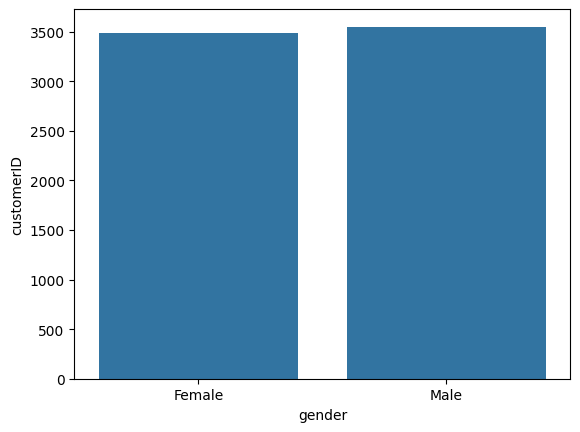

In [ ]:
sns.barplot(data = df_gen, x = 'gender', y = 'customerID')

In [ ]:
df_mpgt = df.groupby(['Churn','PaymentMethod']) ['customerID'].count().reset_index()
df_mpgt.head()

,Churn,PaymentMethod,customerID
0,No,Bank transfer (automatic),1284
1,No,Credit card (automatic),1289
2,No,Electronic check,1294
3,No,Mailed check,1296
4,Yes,Bank transfer (automatic),258


In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

####1. Handling Missing Values:
   We verify that there are no missing values in the data, ensuring all variables are complete for each customer.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
x = df.drop(columns = ['customerID', 'Churn'], axis=1)
y = df[['Churn']]

####2. Conversion of categorical variables:
Categorical variables need to be converted to numeric values, such as 0 or 1.

In [ ]:
x = pd.get_dummies(x)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(y.Churn)
y.Churn = le.transform(y.Churn)

<ipython-input-20-7cfcc118ac49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.Churn = le.transform(y.Churn)


####3. Normalization of Numerical Variables:
   Variables such as Age and Annual Revenue exhibit significant value variations. We will normalize these features to enhance the models' performance.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
m = MinMaxScaler()
x = pd.DataFrame(m.fit_transform(x))

####4. Division between training and testing:

We randomly separated 80% of the data for training and 20% for final testing of the models.


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size = 0.25, stratify=y)

With these transformations, the data is clean and ready for us to apply classification algorithms.

#Regressão Logística.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
lr = model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
lr.predict(x_test)

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
x_test.assign(Chur = y_test).assign(label = lr.predict(x_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,Chur,label
3086,0.0,0.042254,0.022388,0.006952,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0
2186,1.0,0.000000,0.726866,0.008366,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
793,0.0,0.014085,0.457214,0.014407,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
1647,0.0,0.225352,0.160697,0.066230,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
5868,0.0,0.732394,0.882587,0.665440,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3358,0.0,0.281690,0.852239,0.257951,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
5731,0.0,0.957746,0.207463,0.318567,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
2581,0.0,0.605634,0.013433,0.087866,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
6293,0.0,0.056338,0.570149,0.045563,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,1


In [ ]:
!pip install -U scikit-learn


  Using cached scikit_learn-1.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

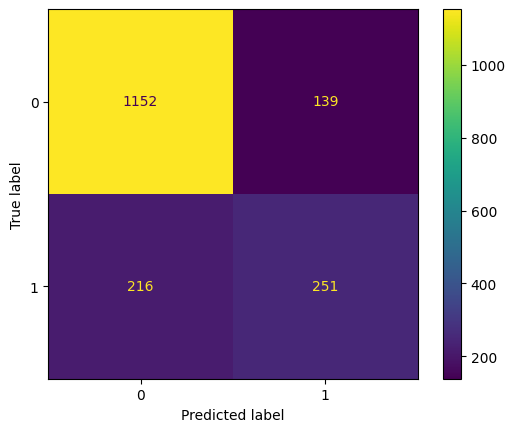

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
print(f'Acurácia(treino):{accuracy_score(y_train, lr.predict(x_train))}')
print(f'Acurácia(Teste): {accuracy_score(y_test, lr.predict(x_test))}')
print('====================================')
print(f'Acurácia Balanceada(treino):{balanced_accuracy_score(y_train, lr.predict(x_train))}')
print(f'Acurácia Balanceada(Teste): {balanced_accuracy_score(y_test, lr.predict(x_test))}')
print('====================================')
print(f'Precision(treino):{precision_score(y_train, lr.predict(x_train))}')
print(f'Precision(Teste): {precision_score(y_test, lr.predict(x_test))}')
print('====================================')
print(f'Recall(treino):{recall_score(y_train, lr.predict(x_train))}')
print(f'Recall(Teste): {recall_score(y_test, lr.predict(x_test))}')
print('====================================')
print(f'F1-score(treino):{f1_score(y_train, lr.predict(x_train))}')
print(f'F1-score(Teste): {f1_score(y_test, lr.predict(x_test))}')
print('====================================')
print(f'ROCAUC(treino):{roc_auc_score(y_train, lr.predict_proba(x_train)[:,1])}')
print(f'ROCAUC(Teste): {roc_auc_score(y_test, lr.predict_proba(x_test)[:,1])}')
print('====================================')

Acurácia(treino):0.8071672354948806
Acurácia(Teste): 0.79806598407281
Acurácia Balanceada(treino):0.7278493091333513
Acurácia Balanceada(Teste): 0.7149023796767939
Precision(treino):0.6629974597798476
Precision(Teste): 0.6435897435897436
Recall(treino):0.5584878744650499
Recall(Teste): 0.5374732334047109
F1-score(treino):0.6062717770034843
F1-score(Teste): 0.5857642940490082
ROCAUC(treino):0.8506245873663361
ROCAUC(Teste): 0.8336838630810902


In [ ]:
!pip uninstall scikit-learn -y


Found existing installation: scikit-learn 1.5.1
Uninstalling scikit-learn-1.5.1:
  Successfully uninstalled scikit-learn-1.5.1


In [ ]:
!pip install scikit-learn


  Using cached scikit_learn-1.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.4 MB)


In [ ]:
!pip install scikit-learn==1.2.2


  Using cached scikit_learn-1.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.1
    Uninstalling scikit-learn-1.5.1:
      Successfully uninstalled scikit-learn-1.5.1


In [ ]:
!pip install virtualenv
!virtualenv myenv
!source myenv/bin/activate
!pip install scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 26.2 MB/s eta 0:00:00
created virtual environment CPython3.10.12.final.0-64 in 984ms
  creator CPython3Posix(dest=/content/myenv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==24.1, setuptools==70.1.0, wheel==0.43.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(x_train, y_train)

<ipython-input-89-50ce4f6b0dc9>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y_train)


RandomForestClassifier()

In [ ]:
y_pred_C = model.predict(x_test)

In [ ]:
rfc.predict(x_test)

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
x_test.assign(Churn = y_test).assign(label = rfc.predict(x_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,Churn,label
3086,0.0,0.042254,0.022388,0.006952,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0
2186,1.0,0.000000,0.726866,0.008366,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
793,0.0,0.014085,0.457214,0.014407,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
1647,0.0,0.225352,0.160697,0.066230,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
5868,0.0,0.732394,0.882587,0.665440,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3358,0.0,0.281690,0.852239,0.257951,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
5731,0.0,0.957746,0.207463,0.318567,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
2581,0.0,0.605634,0.013433,0.087866,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
6293,0.0,0.056338,0.570149,0.045563,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

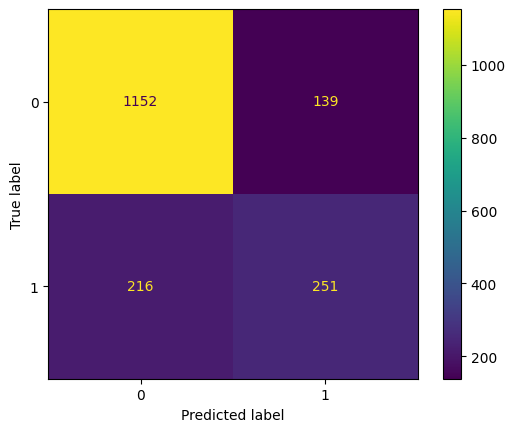

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_C)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
print(f'Acurácia(treino):{accuracy_score(y_train, rfc.predict(x_train))}')
print(f'Acurácia(Teste): {accuracy_score(y_test, rfc.predict(x_test))}')
print('====================================')
print(f'Acurácia Balanceada(treino):{balanced_accuracy_score(y_train, rfc.predict(x_train))}')
print(f'Acurácia Balanceada(Teste): {balanced_accuracy_score(y_test, rfc.predict(x_test))}')
print('====================================')
print(f'Precision(treino):{precision_score(y_train, rfc.predict(x_train))}')
print(f'Precision(Teste): {precision_score(y_test, rfc.predict(x_test))}')
print('====================================')
print(f'Recall(treino):{recall_score(y_train, rfc.predict(x_train))}')
print(f'Recall(Teste): {recall_score(y_test, rfc.predict(x_test))}')
print('====================================')
print(f'F1-score(treino):{f1_score(y_train, rfc.predict(x_train))}')
print(f'F1-score(Teste): {f1_score(y_test, rfc.predict(x_test))}')
print('====================================')
print(f'ROCAUC(treino):{roc_auc_score(y_train, rfc.predict_proba(x_train)[:,1])}')
print(f'ROCAUC(Teste): {roc_auc_score(y_test, rfc.predict_proba(x_test)[:,1])}')
print('====================================')

Acurácia(treino):0.9981039059537353
Acurácia(Teste): 0.7895335608646189
Acurácia Balanceada(treino):0.9973436707890735
Acurácia Balanceada(Teste): 0.6892752825109429
Precision(treino):0.9971428571428571
Precision(Teste): 0.6397694524495677
Recall(treino):0.9957203994293866
Recall(Teste): 0.4753747323340471
F1-score(treino):0.9964311206281228
F1-score(Teste): 0.5454545454545454
ROCAUC(treino):0.9999581839992454
ROCAUC(Teste): 0.8045959757636877


#Importando GridSearchCV

In [ ]:
!pip install --upgrade joblib

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model and parameters
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 1,2,3,4,5,6,7,8,9,10],
}

# Recreate GridSearchCV without parallelization
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_search.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.10/dist-p

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 50, 100]})

In [ ]:
dict = grid_search.best_estimator_.get_params()

In [ ]:
dict

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rfc_tunned = RandomForestClassifier(bootstrap = True,
 ccp_alpha = 0.0,
 class_weight = None,
 criterion = 'gini',
 max_depth = 8,
 max_features = 'sqrt',
 max_leaf_nodes = None,
 max_samples = None,
 min_impurity_decrease = 0.0,
 min_samples_leaf = 1,
 min_samples_split = 2,
 min_weight_fraction_leaf = 0.0,
 n_estimators = 100,
 n_jobs = None,
 oob_score = False,
 random_state = None,
 verbose = 0,
 warm_start = False)

In [ ]:
rfc_tunned

RandomForestClassifier(max_depth=8)

In [ ]:
RandomForestClassifier(max_depth=10, n_estimators=100)

RandomForestClassifier(max_depth=10)

In [ ]:
rfc_tunned.fit(x_train, y_train)

<ipython-input-114-767105460876>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_tunned.fit(x_train, y_train)


RandomForestClassifier(max_depth=8)

In [ ]:
rfc_tunned.predict(x_test)

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
x_test.assign(Churn=y_test).assign(label=rfc_tunned.predict(x_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,Churn,label
3086,0.0,0.042254,0.022388,0.006952,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0
2186,1.0,0.000000,0.726866,0.008366,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
793,0.0,0.014085,0.457214,0.014407,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
1647,0.0,0.225352,0.160697,0.066230,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
5868,0.0,0.732394,0.882587,0.665440,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3358,0.0,0.281690,0.852239,0.257951,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
5731,0.0,0.957746,0.207463,0.318567,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
2581,0.0,0.605634,0.013433,0.087866,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
6293,0.0,0.056338,0.570149,0.045563,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,1


In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
print(f'Acurácia(treino):{accuracy_score(y_train, rfc_tunned.predict(x_train))}')
print(f'Acurácia(Teste): {accuracy_score(y_test, rfc_tunned.predict(x_test))}')
print('====================================')
print(f'Acurácia Balanceada(treino):{balanced_accuracy_score(y_train, rfc_tunned.predict(x_train))}')
print(f'Acurácia Balanceada(Teste): {balanced_accuracy_score(y_test, rfc_tunned.predict(x_test))}')
print('====================================')
print(f'Precision(treino):{precision_score(y_train, rfc_tunned.predict(x_train))}')
print(f'Precision(Teste): {precision_score(y_test, rfc_tunned.predict(x_test))}')
print('====================================')
print(f'Recall(treino):{recall_score(y_train, rfc_tunned.predict(x_train))}')
print(f'Recall(Teste): {recall_score(y_test, rfc_tunned.predict(x_test))}')
print('====================================')
print(f'F1-score(treino):{f1_score(y_train, rfc_tunned.predict(x_train))}')
print(f'F1-score(Teste): {f1_score(y_test, rfc_tunned.predict(x_test))}')
print('====================================')
print(f'ROCAUC(treino):{roc_auc_score(y_train, rfc_tunned.predict_proba(x_train)[:,1])}')
print(f'ROCAUC(Teste): {roc_auc_score(y_test, rfc_tunned.predict_proba(x_test)[:,1])}')
print('====================================')

Acurácia(treino):0.8399696624952597
Acurácia(Teste): 0.7963594994311718
Acurácia Balanceada(treino):0.7663417667794532
Acurácia Balanceada(Teste): 0.7028066153920156
Precision(treino):0.7426086956521739
Precision(Teste): 0.6509695290858726
Recall(treino):0.609129814550642
Recall(Teste): 0.5032119914346895
F1-score(treino):0.6692789968652038
F1-score(Teste): 0.567632850241546
ROCAUC(treino):0.9114358288336616
ROCAUC(Teste): 0.8322400011942339


Through exploratory analysis, data preparation, model training, hyperparameter optimization, and performance metric calculations, we tested two classification algorithms: Logistic Regression and Random Forest. After optimization, the Random Forest algorithm demonstrated superior performance.